In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [2]:
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, size=1000)
print(np.mean(x))

-0.002507611377062389


In [3]:
#check std of x
np.std(x, ddof=1)

1.0239689305172044

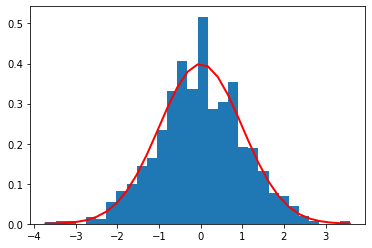

In [4]:
count, bins, ignored = plt.hist(x, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2)), linewidth=2, color='r')
plt.show()

In [30]:
sample_mean = []
sample_median = []

# Bootstrap 1000 sample with replacement, repeat 500 times
for i in range(500):
    sample = np.random.choice(x, size=1000, replace=True)
    mean = np.mean(sample)
    median = np.quantile(sample, 0.5)
    sample_mean.append(mean)
    sample_median.append(median)
    
print('sample mean: {}'.format(mean))
print('sample median: {}'.format(median))

sample mean: 0.061024255057586387
sample median: 0.018524223001350447


In [31]:
avg_sample_mean = np.mean(sample_mean)
avg_sample_median = np.mean(sample_median)
sample_size = len(sample_mean)
se_mean = math.sqrt(np.sum((sample_mean - avg_sample_mean) ** 2) / (sample_size - 1))
se_median = math.sqrt(np.sum((sample_median - avg_sample_median) ** 2) / (sample_size - 1))
print('standard error of mean: {}'.format(se_mean))
print('standard error of median: {}'.format(se_median))

standard error of mean: 0.03217233478167339
standard error of median: 0.03280223631057654


In [32]:
se_median / se_mean

1.0195789809218934

In [29]:
1 / math.sqrt(sample_size)

0.03162277660168379

In [8]:
np.quantile(x, 0.975)

2.019299183083754

In [9]:
np.percentile(x, 97.5)

2.019299183083754

## Q-Q plot example

Quantile-Quantile plot, a non-parametric approach to comparing two distributions

- If the two distributions are similar, the points will approximately lie on the line y=x

- If the distributions are linearly related, the points will approximately lie on a line, but not necessarily on the line y=x

In [10]:
# generate another normal distribution with mean=50 and std=25
y = np.random.normal(loc=50, scale=25, size=1000)

In [12]:
x_100 = [np.percentile(x, i) for i in range(1, 101)]
y_100 = [np.percentile(y, i) for i in range(1, 101)]

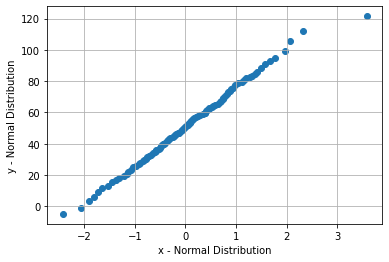

In [13]:
plt.scatter(x_100, y_100)
plt.grid()
plt.ylabel("y - Normal Distribution")
plt.xlabel("x - Normal Distribution")
plt.show()